# **Import Package**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import missingno as msno

# **Reading the data**

In [2]:
path = 'online_retail_II.xlsx'
sheet1 = pd.read_excel(path, 
                   sheet_name=0
                  )
sheet2 = pd.read_excel(path, 
                       sheet_name=1
                      )
df = pd.concat([sheet1, sheet2], axis=0, ignore_index=True)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">
    <h2><strong>Dataset Details:</strong></h2>
    This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.<br>
    Link - <a href="https://archive.ics.uci.edu/dataset/502/online+retail+ii" target="_blank">Online Retail Transaction Data</a>

 
#### **Column Details**
- **`InvoiceNo`:**
    - Invoice number.
    - Nominal.
    - A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  
- **`StockCode`:**
    - Product (item) code.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each distinct product.  
- **`Description`:**
    - Product (item) name.
    - Nominal.  
- **`Quantity`:**
    - The quantities of each product (item) per transaction.
    - Numeric.  
- **`InvoiceDate`:**
    - Invoice date and time.
    - Numeric.
    - The day and time when a transaction was generated.
- **`Price`:**
    - Unit price.
    - Numeric.
    - Product price per unit in sterling (Â£).  
- **`CustomerID`:**
    - Customer number.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each customer.  
- **`Country`:**
    - Country name.
    - Nominal.
    - The name of the country where a customer resides.
</div>

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### **Data types of each column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### **Summarization of Data**

In [5]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,NaN,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,NaN,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,NaN
min,NaN,NaN,NaN,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,NaN
max,NaN,NaN,NaN,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,NaN


### **How many records are there in the dataset?**

In [6]:
print("Number of records in the dataset: ", df.shape[0])

Number of records in the dataset:  1067371


### **Missing Value Analysis**

In [7]:
df.isnull().sum() / df.shape[0] * 100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

<Axes: >

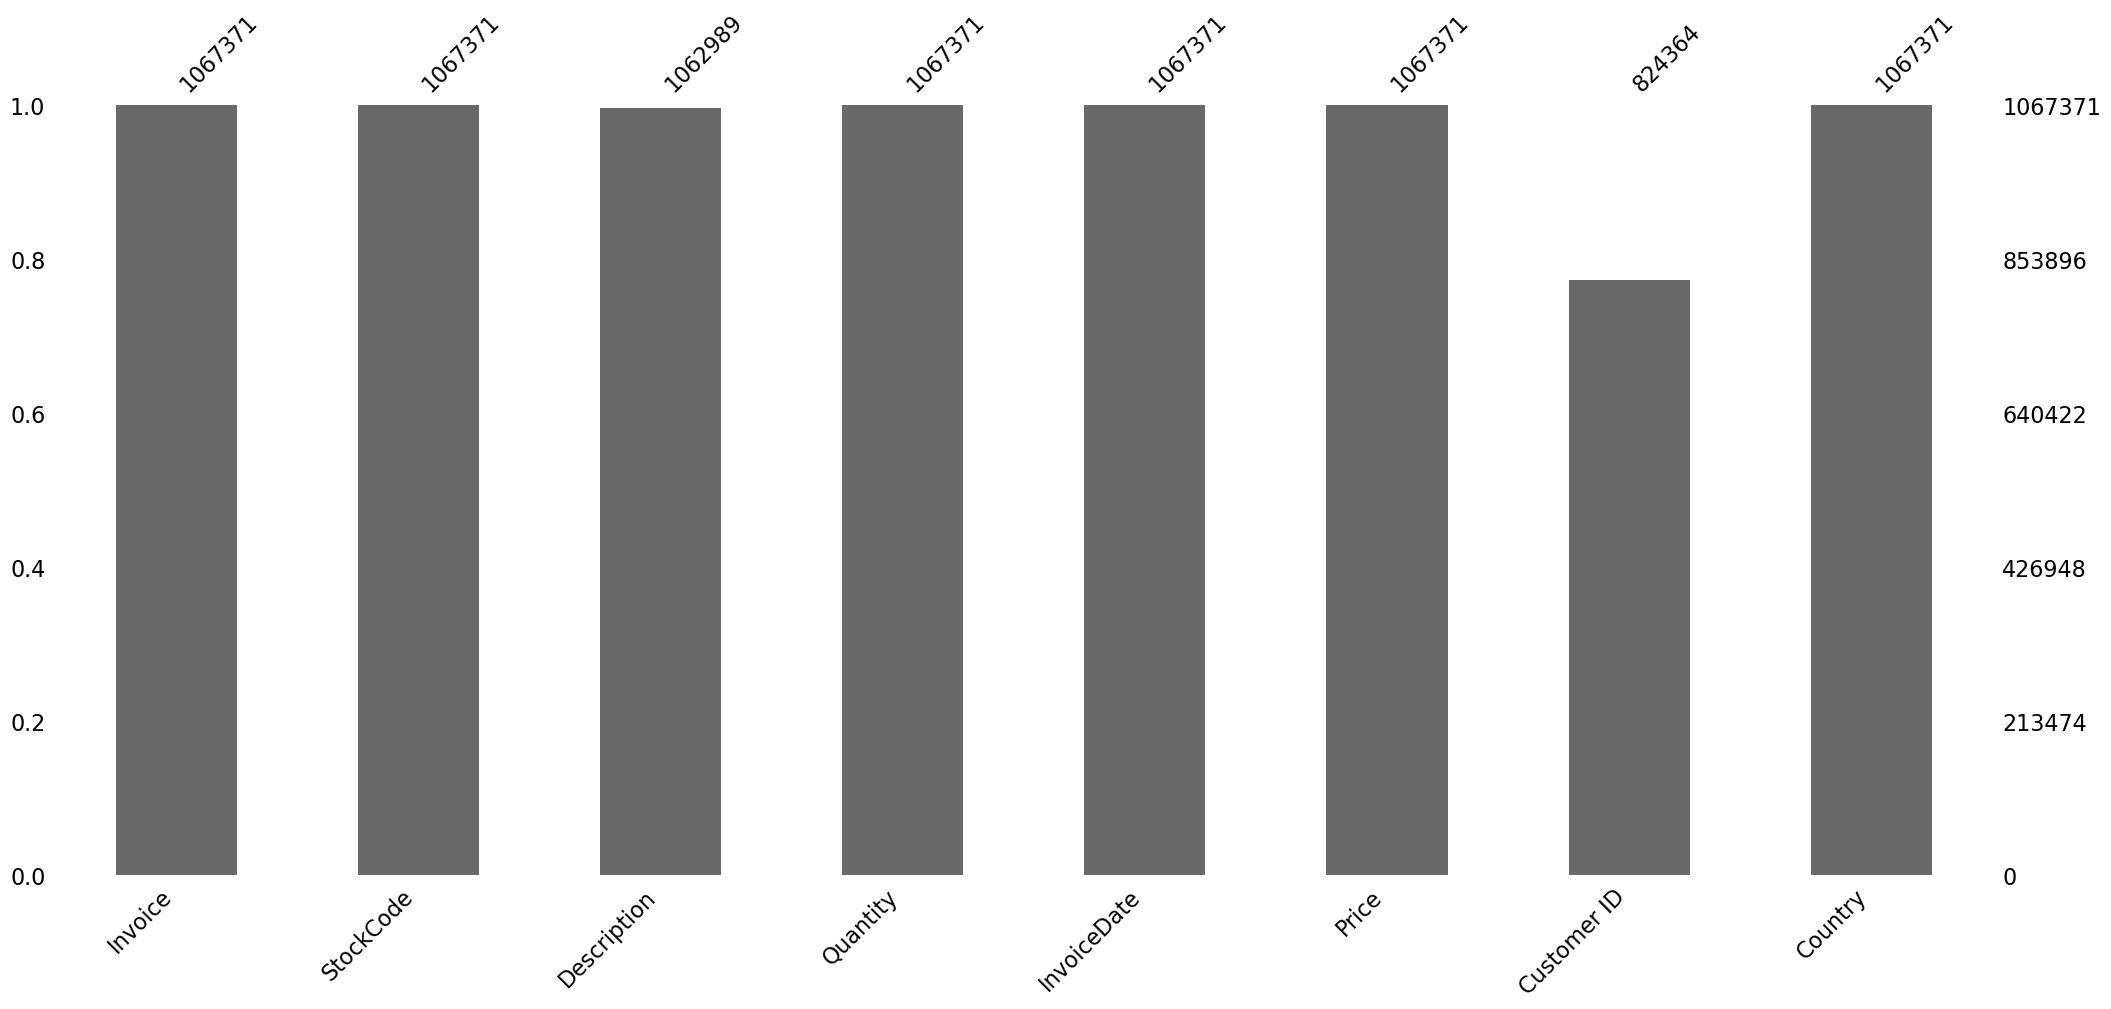

In [8]:
msno.bar(df)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**  
From the above missing value analysis, it is evident that two columns are missing majority of data while other columns has no missing data.

The column names are:
- **`Description (0.411 %)`**
- **`Customer ID (22.767 %)`**
</div>

In [9]:
df[df['Description'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [10]:
print("Number of records with missing Description: ", df[df['Description'].isna()].shape[0])

Number of records with missing Description:  4382


In [11]:
df[df['Description'].isna()]['Price'].value_counts()

Price
0.0    4382
Name: count, dtype: int64

In [12]:
df[df['Description'].isna()]['Customer ID'].value_counts()

Series([], Name: count, dtype: int64)

In [13]:
quantity_type = df[df['Description'].isna()]['Quantity'].value_counts()
quantity_type = quantity_type.reset_index()
quantity_type['Quantity Type'] = quantity_type['Quantity'].apply(lambda a: 'Less than 0' if a < 0 else 'Otherwise')
quantity_type.groupby('Quantity Type')['count'].sum()

Quantity Type
Less than 0    2689
Otherwise      1693
Name: count, dtype: int64

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**    
There are **4382** rows where the **`Description`** column has missing values.  

Upon further analysis, the **`Price`** column has only **0.0** values for each of the missing value of the **`Description`** column.  
The corresponding **`Customer ID`** is also missing.  
Along with that, the **`Quantity`** column has majority values less than **0**, which does not make any sense.  
  
The data might be either corrupted or recorded wrongly for these entries.  
This data should be dropped so that it does not affect the efficiency of ML models adversely.
</div>

In [14]:
df.dropna(subset=['Description'], inplace=True)

In [15]:
df.shape

(1062989, 8)

In [16]:
df[df['Customer ID'].isna()].shape[0]

238625

In [17]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0)].shape[0]

768

In [18]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0)].shape[0]

981

In [19]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0)].shape[0]

749

In [20]:
df[(df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0)].shape[0]

5

In [21]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] > 0)].shape[0]

236122

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**
- There are **238625** missing values in the **`Customer ID`** column.
- There are multiple records in the data where the **`Customer ID`** is missing and the values of other prominant columns like **`Quantity`** and **`Price`** does not make any sense.
    - There are **768** records where **`Price`** is **0.0** but the **`Quantity`** is less than **0**.  
    - There ate **981** records whre **`Price`** is equal to **0.0** but **`Quantity`** is greater than **0**.
    - There are **5** records where the **`Price`** is negative.
    - Finally, there are **749** records where **`Price`** is greater than **0.0** but the **`Quantity`** is less than **0**.
- These ambiguous records which holds no logic needs to be dropped.
- There are **236122** records which are logical but the **`Customer ID`** is missing can be handled by imputing with some common value like **Unknown Customer ID**.

</div>

In [22]:
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0))]

In [23]:
df[df['Customer ID'].isna()].shape[0]

236122

In [24]:
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

In [25]:
df['Customer ID'].head()

0    13085
1    13085
2    13085
3    13085
4    13085
Name: Customer ID, dtype: int64

In [26]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['Customer ID'] = df['Customer ID'].apply(lambda x: "Unknown Customer ID" if x=='0' else x)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [27]:
df['Customer ID'].value_counts()

Customer ID
Unknown Customer ID    236122
17841                   13097
14911                   11613
12748                    7307
14606                    6709
                        ...  
16663                       1
17752                       1
13942                       1
15913                       1
16994                       1
Name: count, Length: 5943, dtype: int64

In [28]:
df['StockCode'] = df['StockCode'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060486 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1060486 non-null  object        
 1   StockCode    1060486 non-null  category      
 2   Description  1060486 non-null  object        
 3   Quantity     1060486 non-null  int64         
 4   InvoiceDate  1060486 non-null  datetime64[ns]
 5   Price        1060486 non-null  float64       
 6   Customer ID  1060486 non-null  object        
 7   Country      1060486 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 66.9+ MB


In [30]:
df.drop(columns=['InvoiceDate']).describe()

,Quantity,Price
count,1.060486e+06,1.060486e+06
mean,1.032382e+01,4.427132e+00
std,1.667588e+02,7.607323e+01
min,-8.099500e+04,0.000000e+00
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [36]:
df[df['Quantity'] < 0]['Price'].value_counts().sort_index(), df[df['Quantity'] < 0]['Price'].value_counts().sort_index().sum()

(Price
 0.01        2
 0.03        5
 0.05        3
 0.06        4
 0.07        5
            ..
 8985.60     1
 10468.80    2
 10953.50    2
 25111.09    1
 38970.00    1
 Name: count, Length: 687, dtype: int64,
 18744)

In [37]:
df['StockCode'].nunique()

4932

In [38]:
df['Country'].nunique()

43

In [39]:
-- SARIMA
-- ARIMA
-- FBProphet
-- SARIMAX
-- Holt winters
-- 

NameError: name 'SARIMA' is not defined